In [19]:
"""
    @description:       File for implementing and saving prediction
    @author:            Daniel F. Perez-Ramirez
    @collaborators:     Akhila Rao, Rasoul Behrabesh, Rebecca Steinert
    @project:           DASH
    @date:              24.06.2020
"""

'\n    @description:       File for implementing and saving prediction\n    @author:            Daniel F. Perez-Ramirez\n    @collaborators:     Akhila Rao, Rasoul Behrabesh, Rebecca Steinert\n    @project:           DASH\n    @date:              24.06.2020\n'

In [20]:
import load_data as ld
from data_columns import *
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
plt.rcParams.update({'font.size': 16,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.labelsize': 16,
                     'legend.fontsize': 13, 
                     'font.serif': 'Times'})
colors=['#94b4a4', '#deebf7', '#fff7bc']

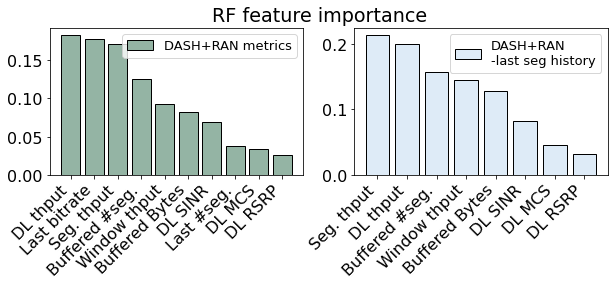

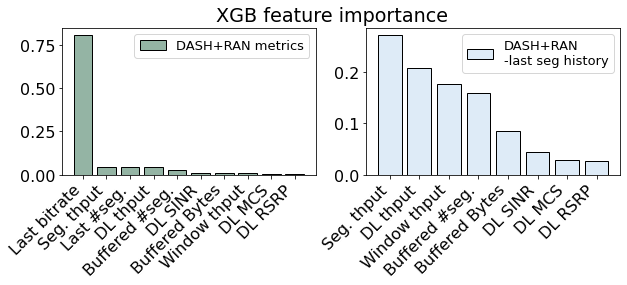

In [21]:
#==================================================
# Feature importance plots
#==================================================

# RF brate
model_nums_rf_brate = ['model201', 'model203']
# XGB brate
model_nums_xgb_brate = ['model201', 'model203']
feat_set_str = ['DASH+RAN metrics',
                #'DASH metrics',
                'DASH+RAN\n-last seg history']
# give more descriptive names for the features
FEAT_COLS_READABLE = [['Last #seg.', 'Last bitrate', 'Seg. thput', 'Window thput',
                       'Buffered Bytes', 'Buffered #seg.',
                       'DL RSRP', 'DL SINR', 
                       'DL MCS', 'DL thput'],
                      #['Last #seg.', 'Last bitrate', 'Seg. thput', 'Window thput',
                      # 'Buffered Bytes', 'Buffered #seg.'],
                      ['Seg. thput', 'Window thput',
                       'Buffered Bytes', 'Buffered #seg.', 
                       'DL RSRP', 'DL SINR', 
                       'DL MCS', 'DL thput']] 

# RF brate
model_types = ['rf', 'xgb']
titles = {'rf': 'RF', 
          'xgb': 'XGB'}
pred_var = 'brate'

for model_type in model_types:
    fig, axs = plt.subplots(1, 2, figsize = (10,3))
    fig.suptitle(titles[model_type]+' feature importance')
    fig.autofmt_xdate(rotation=45)
    for i in range(len(model_nums_rf_brate)):
        dir_models = '../models/'+model_type+'/' + model_nums_rf_brate[i] + '/'
        path = dir_models + 'brate_classifier.pkl'
        with open(path, 'rb') as f:
            model_dict = pickle.load(f)
        model = model_dict["classifier"]
        featcols = np.array(FEAT_COLS_READABLE[i])
        importances = np.array(model.feature_importances_)
        indices = np.argsort(importances)[::-1]
        #axs[i].set_title(feat_set_str[i])
        axs[i].bar(featcols[indices], importances[indices],
                color=colors[i], align="center", 
                   label = feat_set_str[i], edgecolor ='k') 
        axs[i].legend()
    plt.show()

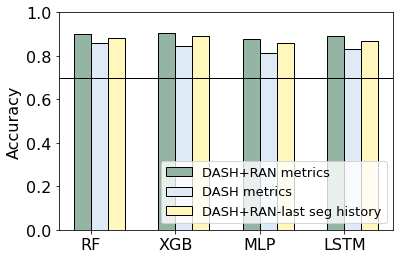

In [22]:
#=================================================
# Bitrate prediction accuracy plot (data from csv)
#=================================================

baseline_brate_acc = 0.699
plt.figure(3)
width = 0.2
# accuracy roc_auc f1score
# rf, xgb, mlp, lstm 
# 2,12 window size 
# num MLP/LSTM layers = 2 
dash_ran_acc = [0.900, 0.906, 0.878, 0.892]
dash_acc = [0.857, 0.846, 0.815, 0.831]
dash_ran_minus_last_acc = [0.884, 0.891, 0.861, 0.869]

dash_ran_bar = np.arange(len(dash_ran_acc)) 
dash_bar = [x + width for x in dash_ran_bar]
dash_ran_minus_last_bar = [x + width for x in dash_bar]
plt.bar(dash_ran_bar, dash_ran_acc, color =colors[0], 
        width =width, edgecolor ='k', 
        label ='DASH+RAN metrics',align='edge')  
plt.bar(dash_bar, dash_acc, color =colors[1], 
        width = width, edgecolor ='k', 
        label ='DASH metrics',align='edge')
plt.bar(dash_ran_minus_last_bar, dash_ran_minus_last_acc, color =colors[2], 
        width = width, edgecolor ='k', 
        label ='DASH+RAN-last seg history',align='edge')
plt.axhline(y=baseline_brate_acc,linewidth=1, color='k')
plt.ylabel('Accuracy')
plt.ylim(0,1.0)
#plt.title('Comparison of models to predict request bitrate')
plt.xticks([r + width for r in range(len(dash_ran_bar))], 
           ['RF', 'XGB', 'MLP', 'LSTM']) 
plt.legend(loc ="lower right")

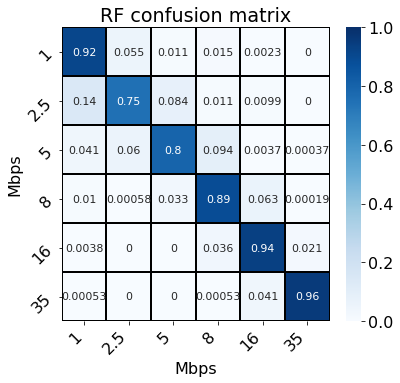

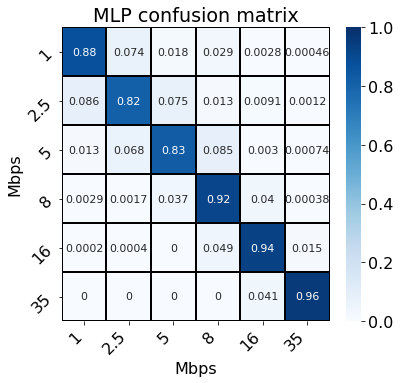

In [31]:
#================================================
# Confusion matrix plot (data from file)
#================================================

# featset1
import seaborn as sns
rf_conf_mat = [[0.87552059, 0.0740398, 0.0180472, 0.02915317, 0.00277649, 0.00046275],
 [0.08587944, 0.81626755, 0.07473163, 0.01279934, 0.0090834, 0.00123865],
 [0.01331361, 0.06841716, 0.82914201, 0.08542899, 0.00295858, 0.00073964],
 [0.00287632, 0.00172579, 0.03662512, 0.91888782, 0.03950144, 0.00038351],
 [0.00019755, 0.0003951, 0.0, 0.04938759, 0.93500593, 0.01501383],
 [0.0, 0.0, 0.0, 0.0, 0.04142326, 0.95857674]]

mlp_conf_mat = [[0.91716798, 0.0550671, 0.01064322, 0.01480796, 0.00231374, 0.0],
 [0.14492155, 0.75020644, 0.08422791, 0.01073493, 0.00990917, 0.0],
 [0.04142012, 0.05991124, 0.80066568, 0.09393491, 0.00369822, 0.00036982],
 [0.01035475, 0.00057526, 0.03298178, 0.89261745, 0.063279, 0.00019175],
 [0.00375346, 0.0, 0.0, 0.03615172, 0.93935203, 0.02074279],
 [0.00053107, 0.0, 0.0, 0.00053107, 0.04089219, 0.95804567]]

labels = ['1', '2.5', '5', '8', '16', '35']
plt.figure(figsize=(len(labels),len(labels)))
hmap = sns.heatmap(mlp_conf_mat, vmin=0, cmap='Blues', 
                   xticklabels = labels, yticklabels = labels, 
                   annot=True, vmax=1, annot_kws={"fontsize":11}, linewidths=1, linecolor='black')
fig = hmap.get_figure()
plt.title('RF confusion matrix')
plt.yticks(rotation=45, fontsize=16)
plt.xlabel('Mbps')
plt.ylabel('Mbps')
fig.autofmt_xdate(rotation=45)
plt.show()

plt.figure(figsize=(len(labels),len(labels)))
hmap = sns.heatmap(rf_conf_mat, vmin=0, cmap='Blues', 
                   xticklabels = labels, yticklabels = labels, 
                   annot=True, vmax=1, annot_kws={"fontsize":11}, linewidths=1, linecolor='black')
fig = hmap.get_figure()
plt.title('MLP confusion matrix')
plt.yticks(rotation=45, fontsize=16)
plt.xlabel('Mbps')
plt.ylabel('Mbps')
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
#=========================================================
# Time series prediction errors for a single UE in a run
#=========================================================

# Load one run for one UE to see the windowed data
# plot errors for one run for one UE
eval_runs = [12,21,27,6]
run_num = 6
node_id = 2       
model_type = 'rf'

# plot all the columns of the windowed data 
eval_data_file = '../data/data_eval/dataset7-4sWsize-4aggsize/run'+str(run_num)+'wsize4.csv'
df = pd.read_csv(eval_data_file)
selected_metrics = df.columns
df_per_node = df[df['Node'] == node_id]
df_per_node = df_per_node.reset_index() 
print ("Node " + str(node_id) + " has size " + str(df_per_node.shape))
#df_per_node[selected_metrics].plot(subplots=True, marker='.', title = 'Client '+str(node_id), grid = True, figsize=(20,20))
#plt.xlim(0,200)
#plt.show()

# plot the errors 
# read the data_eval_output file to get predicted and ground truth values
predictions_data_file = '../data/data_eval_output/dataset7-4sWsize-4sAggsize/run'+str(run_num)+'wsize4eval_out_'+model_type+'.csv'
groundtruth_data_file = '../data/data_eval_output/dataset7-4sWsize-4sAggsize/ground_truth_run'+str(run_num)+'wsize4eval_out_'+model_type+'.csv'
df_pr = pd.read_csv(predictions_data_file)
df_pr = df_pr[df_pr['mode-SegQuality'] > 0]
df_gt = pd.read_csv(groundtruth_data_file, sep='\t')
print(df_pr.shape)
print(df_gt.shape)

df_pr_node = df_pr[df_pr['Node'] == node_id]
print(df_pr_node.shape)
df_pr_node = df_pr_node.reset_index()
print(df_pr_node.shape)
plt.figure(figsize=(10,2))
#df_pr_node.plot(subplots=True, marker='.', title = 'Pred Client '+str(node_id), grid = True, figsize=(20,20))
plt.plot(df_pr_node['Tpred_start'], df_pr_node['mode-SegQuality'])

df_gt_node = df_gt[df_gt['Node'] == node_id]
print(df_gt_node.shape)
df_gt_node = df_gt_node.reset_index()
print(df_gt_node.shape)
#plt.figure()
#df_gt_node.plot(subplots=True, marker='.', title = 'Ground Truth Client '+str(node_id), grid = True, figsize=(20,20))
plt.plot(df_gt_node['Treal_start'], df_gt_node['seg-qual'])

fig, axs = plt.subplots(4, sharex=True, 
                        sharey=True, figsize=(10,6))
fig.suptitle(' ')
#plt.figure(5,figsize=(10,1))
axs[0].plot(df_gt_node['seg-qual'], 'k-')
axs[0].plot(df_pr_node['mode-SegQuality'], 'b--')
axs[0].legend(['ground truth', 'RF prediction'])
#plt.figure(6,figsize=(10,1))
axs[1].plot(df_gt_node['seg-qual'], 'k-')
axs[1].plot(df_pr_node['mode-SegQuality'], 'c--')
axs[1].legend(['ground truth', 'XGB prediction']) 
#plt.figure(7,figsize=(10,1))
axs[2].plot(df_gt_node['seg-qual'], 'k-')
axs[2].plot(df_pr_node['mode-SegQuality'], 'r--')
axs[2].legend(['ground truth', 'MLP prediction'])        
#plt.figure(8,figsize=(10,1))
axs[3].plot(df_gt_node['seg-qual'], 'k-')        
axs[3].plot(df_pr_node['mode-SegQuality'], 'g--')
axs[3].legend(['ground truth', 'LSTM prediction'])
plt.xlabel('samples')
fig.text(0.0, 0.5, 'brate', 
         va='center', rotation='vertical')
plt.tight_layout()